# PCA and Image Classification on MNIST Dataset

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. The set of images in the MNIST database is a combination of two of NIST's databases: Special Database 1 and Special Database 3. Special Database 1 and Special Database 3 consist of digits written by high school students and employees of the United States Census Bureau, respectively.

<img src='https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png'>

In [71]:
import sklearn
print("Scikit-Learn version: ", sklearn.__version__)

Scikit-Learn version:  1.0.2


Loading necessary libraries

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
np.set_printoptions(threshold=np.inf)
import warnings
warnings.filterwarnings("ignore")

Using sklearn "fetch_openml" to download Labels and Predictor of MNIST dataset

In [73]:
X, Y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

Checking shape of downloaded data

In [74]:
print(X.shape)
print(Y.shape)

(70000, 784)
(70000,)


Let's check what is inside X and Y

In [75]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [76]:
Y[0]

'5'

Notice that we have 70000 images data in this dataset, but columns are 784. This dataset is being provided in flatten image format. The process of flatten image format has been shown below:

<img src='https://i1.wp.com/www.marktechpost.com/wp-content/uploads/2019/06/image-16.png?resize=653%2C299&ssl=1'>

In above figure, you can see that 3x3 vector or matrix (2D) is being converted to 1x9 vector or matrix (1D). Hence in MNIST data set we have 1D vector of all pixels for a particluar image. So, 28x28 pixels image creates a 1D vector of 784 values.

Let's plot first 10 images with their labels using matplotlib. Notice that 1D image has been reshaped to 2D image using numpy

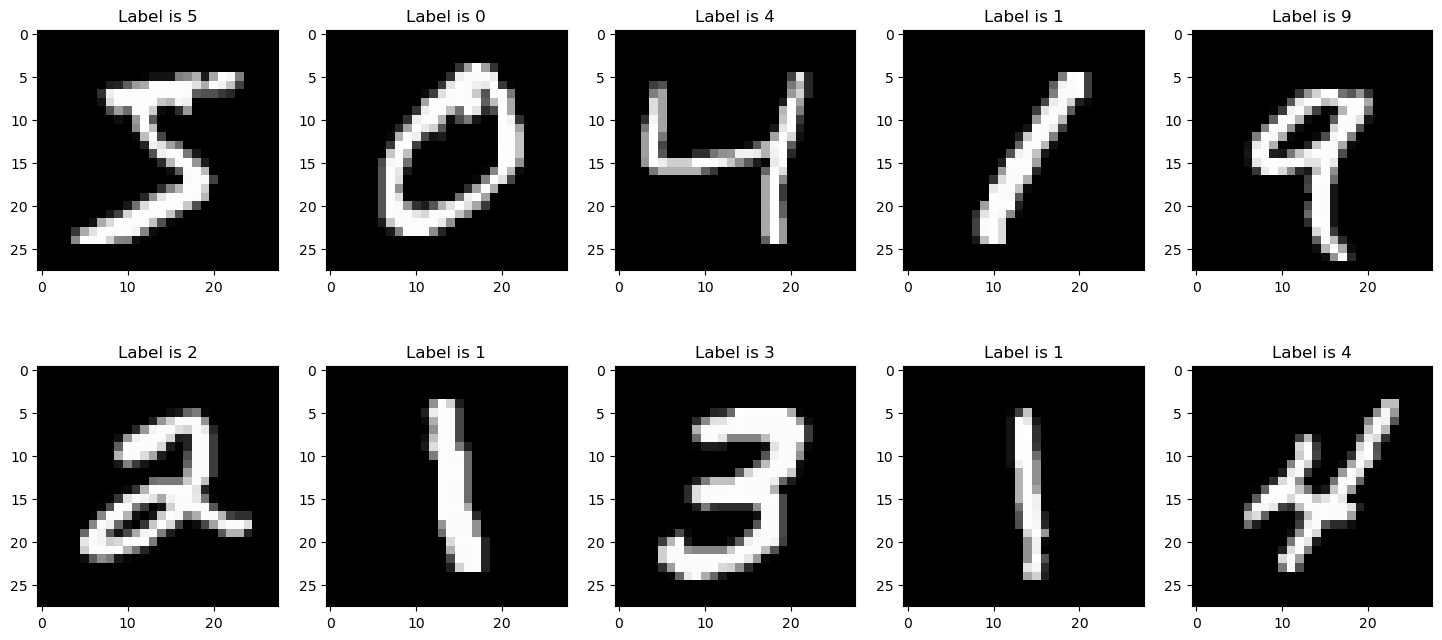

In [80]:
fig, axs = plt.subplots(2,5, figsize=(18, 8))
axs = axs.ravel()

for i in range(0,10):
    image = X[i]
    image = np.array(image, dtype='int')
    pixels = image.reshape((28, 28))
    axs[i].imshow(pixels, cmap='gray')
    axs[i].set_title('Label is '+str(Y[i]))

Let's visualize one of the image content and check that how pixels are distrubted within 28x28 images

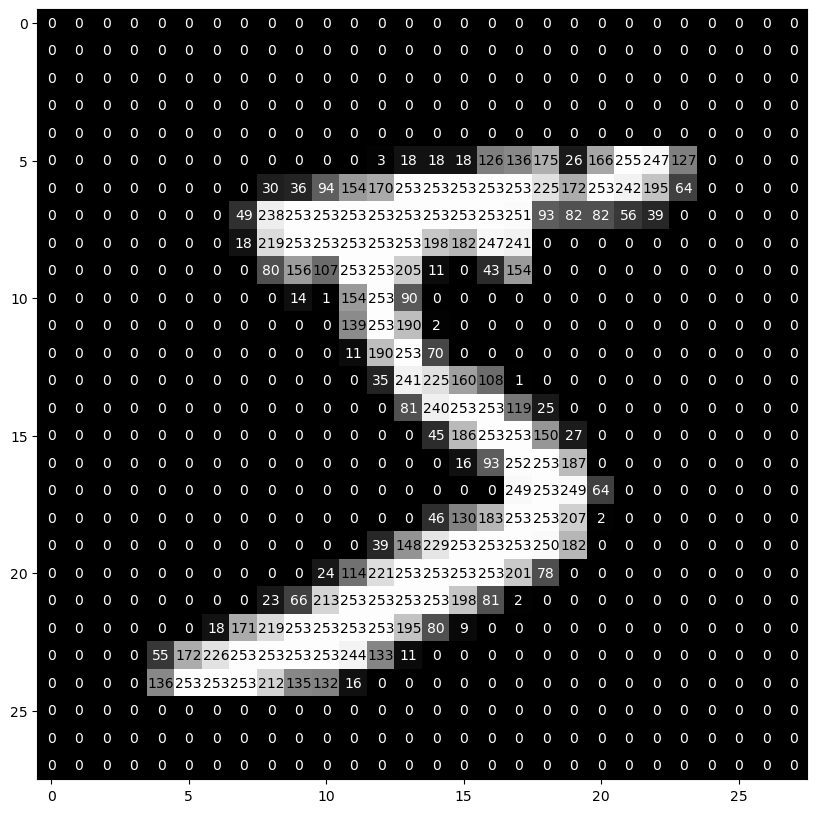

In [81]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

first_image = X[0]
first_image = np.array(first_image, dtype='int')
pixels = first_image.reshape((28, 28)) 
fig = plt.figure(figsize = (10,10)) 
ax = fig.add_subplot(111)
visualize_input(pixels, ax)

# Variance explained

In [82]:
X.shape

(70000, 784)

In [83]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

expl=pca.explained_variance_ratio_
cdf=[sum(expl[:i+1]) for i in range(len(expl))]

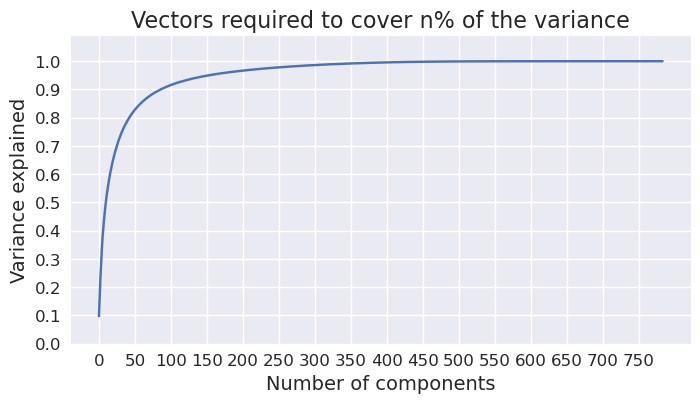

In [84]:
plt.style.use('seaborn')
fig = plt.figure(figsize=(8,4),dpi=100)
ax = plt.plot(range(len(expl)), cdf);

plt.margins(0.05,0.1)
plt.xticks(range(0,X.shape[1]+1,50), fontsize=12);
plt.yticks(np.arange(0,1.1,0.1), fontsize=12);

plt.xlabel('Number of components', fontsize=14);
plt.ylabel('Variance explained', fontsize=14);
plt.title('Vectors required to cover n% of the variance', fontsize=16);
plt.style.use('default')

#### Task: Perform Train Test split with test size 15% and random_state=42

In [85]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.15, random_state=42,shuffle=True)

print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(59500, 784) (59500,)
(10500, 784) (10500,)


Importing and Applying PCA. Notice the code below has .95 for the number of components parameter. It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.

In [86]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95,random_state=42)

Fit transform training and testing images using PCA model instance

In [87]:
pca.fit(xtrain)


train_img=pca.transform(xtrain)
test_img=pca.transform(xtest)

Now checking principal components of training and testing images after applying PCA which are represnting 95% variance of original images data

In [88]:
print(train_img.shape,ytrain.shape)
print(test_img.shape,ytest.shape)

(59500, 154) (59500,)
(10500, 154) (10500,)


Now let's use Logistic regression to perform image classification

In [90]:
from sklearn.linear_model import LogisticRegression
import timeit

#### Task: Define instance of Logistic regression with solver as 'lbfgs', multi_class as 'multinomial', max_iter=300 and random state as 42

In [118]:
# 300 is not enough , 3000 is good
model= LogisticRegression(max_iter=300, random_state=42)

#### Task: Fit model on training images and training label

In [119]:
# write code here
model.fit(xtrain, ytrain)

LogisticRegression(max_iter=300, random_state=42)

#### Task: Get Prediction on testing images

In [99]:
pred=model.predict(xtest)

#### Task: Calculate and print accuracy score for predictions

In [97]:
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(ytest, pred).round(2)
print(accuracy)

0.92


#### Task: Print classification report  and analyze

In [98]:
from sklearn.metrics import classification_report
print(classification_report(ytest, pred))
#write code here

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1035
           1       0.95      0.97      0.96      1205
           2       0.90      0.89      0.90      1019
           3       0.88      0.90      0.89      1081
           4       0.92      0.92      0.92       968
           5       0.90      0.85      0.88       970
           6       0.92      0.95      0.93      1009
           7       0.93      0.94      0.94      1110
           8       0.89      0.86      0.87      1016
           9       0.90      0.91      0.91      1087

    accuracy                           0.92     10500
   macro avg       0.92      0.92      0.92     10500
weighted avg       0.92      0.92      0.92     10500



#### Task: Get weighted average of F1 score

In [106]:
from sklearn.metrics import f1_score

f1=f1_score(ytest, pred, average='weighted').round(2)
print(f1)

0.92


Hence we can see that both Acuracy and F1 Score are around 91.4% and it is really good score for 154 components instead of all 784 pixels

Now let's do comparison of Model performance against difference Maximal Variance and Components

In [107]:
#defining list of Variance
pca_var=[1.0,.99,.95,.90,.85,.80,.75]

#defining empty lists
accuracy_list=[]
f1_list=[]
pca_components=[]
training_time=[]
prediction_time=[]

In [108]:
for v in pca_var:
    
    #applying PCA
    if v==1.0:
        train_img=xtrain
        test_img=xtest
        
    else:
        pca = PCA(v,random_state=42)
        pca.fit(xtrain)
        train_img=pca.transform(xtrain)
        test_img=pca.transform(xtest)
    
    #model
    model=LogisticRegression(solver='lbfgs',multi_class='multinomial', max_iter=300, random_state=42)
    
    #training
    t_start = timeit.default_timer()
    model.fit(train_img,ytrain)
    t_stop = timeit.default_timer()
    
    #prediction
    p_start = timeit.default_timer()
    pred=model.predict(test_img)
    p_stop = timeit.default_timer()
    
    #Append data in lists
    accuracy_list.append(np.round(accuracy_score(ytest,pred),4))
    f1_list.append(np.round(f1_score(ytest,pred, average='weighted'),4))
    pca_components.append(train_img.shape[1])
    training_time.append(np.round(t_stop-t_start,0))
    prediction_time.append(np.round(p_stop-p_start,0))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Creating comparison data frame

In [109]:
comparison_dict={'Variance Retained':pca_var,'Number of Components':pca_components,
               'Training Time':training_time,'Prediction Time':prediction_time,
               'Accuracy Score':accuracy_list,'F1 Score':f1_list}
comparison=pd.DataFrame(comparison_dict)
comparison

,Variance Retained,Number of Components,Training Time,Prediction Time,Accuracy Score,F1 Score
0,1.00,784,24.0,0.0,0.9199,0.9197
1,0.99,331,14.0,0.0,0.9162,0.9159
2,0.95,154,11.0,0.0,0.9137,0.9133
3,0.90,87,10.0,0.0,0.9160,0.9158
4,0.85,59,10.0,0.0,0.9114,0.9111
5,0.80,43,10.0,0.0,0.9037,0.9033
6,0.75,33,9.0,0.0,0.8966,0.8961


So we can see that Model performance is not much degraded untill 87 components compared to all 784 components. Hence we can use 90% Variance using PCA to perform image classification in this dataset.

## Exporting PCA and Model for deployment

Python pickle module is used for serializing and de-serializing a Python object structure. Any object in Python can be pickled so that it can be saved on disk. What pickle does is that it “serializes” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

<img src='https://miro.medium.com/max/466/1*Menz4NWvM6Ca8H6B0d6VrQ.png' width="200" height="400">

In [110]:
import pickle as pk

Exporting pickle file for PCA at 90% Explained Variance to be used while transforming data in Model Deployment

In [111]:
pca = PCA(.90,random_state=42)
pca.fit(xtrain)
train_img=pca.transform(xtrain)
pk.dump(pca, open("pca.pkl","wb"))

Exporting pickle file for Trained Model to be used for taking prediction of future images after Model Deployment

In [112]:
model=LogisticRegression(solver='lbfgs',multi_class='multinomial', max_iter=300, random_state=42)
model.fit(train_img,ytrain)
pk.dump(model, open("model.pkl","wb"))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Visalizing PCA Components and Image Compression

#### Task: Define empty PCA instance with randome state 42

In [120]:
# if n_components is not set all components are kept (784 in this case)
from sklearn.decomposition import PCA
pca = PCA()


#### Task: Fit PCA on X (without scaled)

In [121]:
pca.fit(X)

PCA()

#### Task: Check number of components using .n_components_ attribute

In [125]:
#write code here
pca.n_components_

784

Calculating total varaince

In [126]:
tot = sum(pca.explained_variance_)
tot

3430023.4480794794

Calculating Percentage of Explained Variance against each component

In [127]:
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
print(var_exp[0:5])

[9.746115922494743, 7.155444586878714, 6.149530980722986, 5.403384528548244, 4.888933703877893]


Calculating Cumilative Explained Variance

In [128]:
cum_var_exp = np.cumsum(var_exp)

Plot can help you understand the level of redundancy/information present in multiple dimensions.

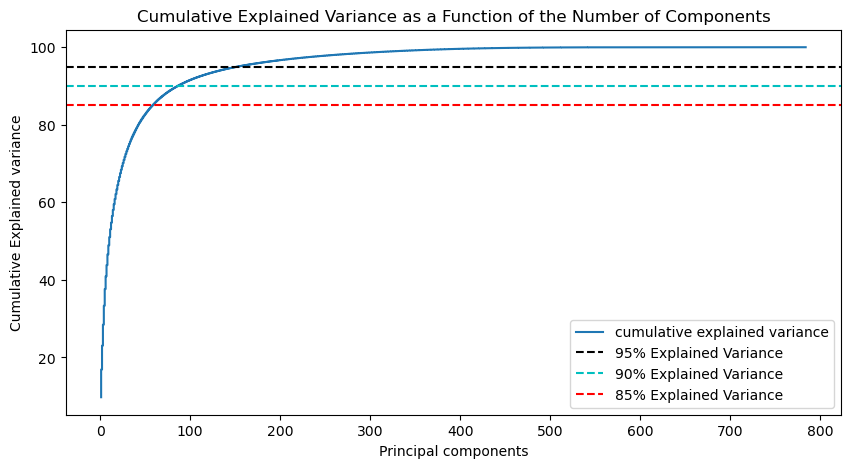

In [129]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.step(range(1, 785), cum_var_exp,label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()

Now plotting Image Compression against 100%, 99%, 95%, 90%, and 85% of Explained Variance

In [130]:
def explainedVariance(percentage, images): 
    pca = PCA(percentage)
    pca.fit(images)
    components = pca.transform(images)
    approxOriginal = pca.inverse_transform(components)
    return approxOriginal

In [131]:
pca_var=[1.0,.99,.95,.90,.85]

In [132]:
components = [784, np.argmax(cum_var_exp > 99) + 1, np.argmax(cum_var_exp > 95) + 1, np.argmax(cum_var_exp > 90) + 1, 
              np.argmax(cum_var_exp >= 85) + 1]
components

[784, 331, 154, 87, 59]

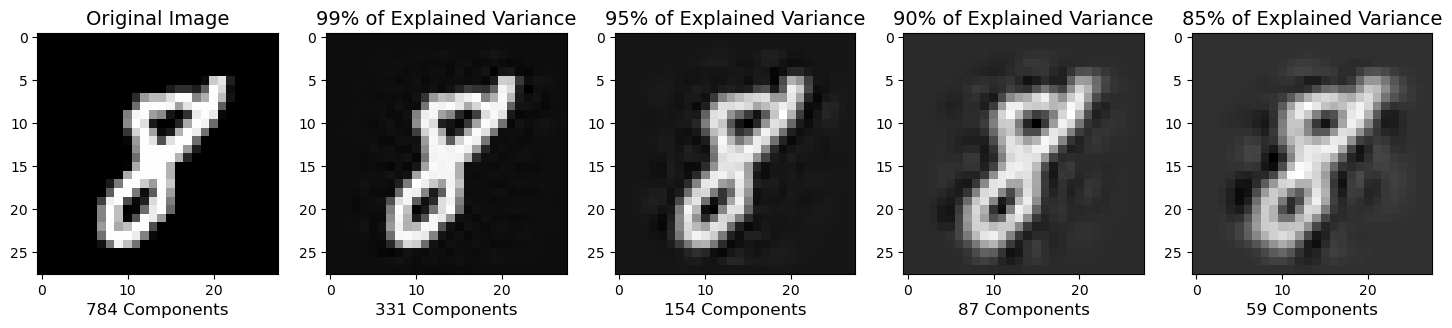

In [133]:
fig, axs = plt.subplots(1,5, figsize=(18, 8))
axs = axs.ravel()

for i,perc in enumerate(pca_var):
    if perc==1.0:
        axs[i].imshow(X[17].reshape(28,28),cmap='gray');
        axs[i].set_xlabel(str(components[i])+' Components', fontsize = 12)
        axs[i].set_title('Original Image', fontsize = 14)
    else:
        axs[i].imshow(explainedVariance(perc,X)[17].reshape(28,28),cmap='gray');
        axs[i].set_xlabel(str(components[i])+' Components', fontsize = 12)
        axs[i].set_title(str(int(perc*100))+'% of Explained Variance', fontsize = 14)
  